## importing packages, setting working directory

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2 as cv

## testing tensorflow

In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Metal device set to: Apple M1


2022-07-05 11:05:04.933074: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-05 11:05:04.933467: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(1,1)),
                          keras.layers.Dense(3, activation = 'relu'), 
                          keras.layers.Dense(3, activation = 'relu'), 
                          keras.layers.Dense(3, activation = 'relu'), 
                          keras.layers.Dense(1, activation = 'sigmoid')])

In [4]:
model.compile(optimizer='SGD',
              loss='mse',
              metrics=['accuracy'])

In [5]:
a = np.arange(-3,3, .01)
train_inputs = a.reshape((-1, 1, 1))
train_labels = (train_inputs ** 2) > 1

In [6]:
model.fit(train_inputs, train_labels, epochs=100)

Epoch 1/100


2022-07-05 11:05:28.377916: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-05 11:05:28.545248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 2s 10ms/step - loss: 0.1636 - accuracy: 0.6683
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.6733
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.6800
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1572 - accuracy: 0.6867
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1552 - accuracy: 0.6917
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 0.7000
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1513 - accuracy: 0.7050
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1495 - accuracy: 0.7117
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.7217
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1459 - accuracy: 0.7267
Epoch 11/100
19/19 [

19/19 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9500
Epoch 84/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0738 - accuracy: 0.9517
Epoch 85/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 0.9517
Epoch 86/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0727 - accuracy: 0.9517
Epoch 87/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9550
Epoch 88/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0716 - accuracy: 0.9550
Epoch 89/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.9567
Epoch 90/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9567
Epoch 91/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9550
Epoch 92/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0696 - accuracy: 0.9567
Epoch 93/100


In [7]:
prediction = model.predict(np.arange(-10,10,.01).reshape((-1,1,1)))

63/63 [==============================] - 0s 2ms/step


2022-07-05 11:05:50.596819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
from matplotlib import pyplot as plt

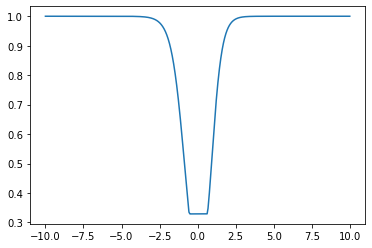

In [10]:
plt.plot(np.arange(-10,10,.01), prediction)

## load class names

In [11]:
import os

In [14]:
class_names = []
for name in os.listdir('Data/Train'):
    if name[0] != '.':
        class_names.append(name)

In [15]:
class_names = np.sort(class_names)
print(class_names)

['Bedroom' 'Coast' 'Forest' 'Highway' 'Industrial' 'Inside_City' 'Kitchen'
 'Livingroom' 'Mountain' 'Office' 'Open_Country' 'Store' 'Street' 'Suburb'
 'Tall_Building']


## testing GPU speed vs CPU speed

In [19]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.linalg.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([5000, 5000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([5000, 5000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 6790.60ms
On GPU:
10 loops: 2.09ms


## creating DataSet

In [12]:
points =  np.arange(-5,5,.01).reshape((-1,1))

dataset = tf.data.Dataset.from_tensor_slices((points, points **2 > 1)) 
dataset = dataset.shuffle(10)
dataset = dataset.batch(batch_size=5)
for sample in dataset:
    print(sample)

(<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[-4.98],
       [-5.  ],
       [-4.93],
       [-4.9 ],
       [-4.87]])>, <tf.Tensor: shape=(5, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])>)
(<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[-4.91],
       [-4.94],
       [-4.95],
       [-4.97],
       [-4.92]])>, <tf.Tensor: shape=(5, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])>)
(<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[-4.85],
       [-4.89],
       [-4.8 ],
       [-4.83],
       [-4.82]])>, <tf.Tensor: shape=(5, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])>)
(<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[-4.99],
       [-4.79],
       [-4.88],
       [-4.77],
       [-4.75]])>, <tf.Tensor: shape=(5, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ Tr

In [13]:

img_height = 227
img_width = 227
train_ds = tf.keras.utils.image_dataset_from_directory(
    'Data/Train',
    validation_split=0,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=10)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'Data/Test',
    validation_split=0,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=10)

Found 2985 files belonging to 15 classes.
Found 1500 files belonging to 15 classes.


In [14]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1/255.)(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
print(labels_batch[0].shape)

0.0 1.0
()


2022-07-06 10:12:03.934640: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 227, 227, 3)
(10,)


2022-07-06 10:13:14.281768: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## testing costume model

In [72]:
class Sample_net(tf.keras.Model):
    def __init__(self):
        super(Sample_net, self).__init__()
        self.my_layers = []
        self.my_layers.append(keras.layers.Rescaling(1/255., input_shape=(227,227,3)))
        self.my_layers.append(keras.layers.Conv2D(96, (11,11), activation='relu'))
        self.my_layers.append(keras.layers.Conv2D(96, (11,11), activation='relu'))
        self.my_layers.append(keras.layers.Flatten())
        self.my_layers.append(keras.layers.Dense(4096, activation='relu'))
        self.my_layers.append(keras.layers.Dense(4096, activation='relu'))
        self.my_layers.append(keras.layers.Dense(15, activation='relu'))
        self.my_layers.append(keras.layers.Softmax())
        self.build(input_shape=(None,227,227,3))
        
    def call(self, input_tensor, training=False):
        output = input_tensor
        for layer in self.my_layers:
            output = layer(output, training=training)
        return output
        

In [24]:
try:
    del model
except:
        pass




model_input = keras.Input(shape=(227,227,3))
model_output = keras.layers.Rescaling(1/255.)(model_input)
model_output = keras.layers.Conv2D(96, (11,11),strides=4, activation='relu')(model_output)
model_output = keras.layers.Conv2D(96, (3,3),strides=2, activation='relu')(model_output)
model_output = keras.layers.Flatten()(model_output)
model_output = keras.layers.Dense(4096, activation='relu')(model_output)
model_output = keras.layers.Dense(4096, activation='relu')(model_output)
model_output = keras.layers.Dense(15, activation='relu')(model_output)
model_output = keras.layers.Softmax()(model_output)
model = keras.Model(model_input, model_output)

In [27]:
# del model

model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss=tf.keras.losses.categorical_crossentropy(from_logits=True),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[]
             )
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 227, 227, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 96)        83040     
                                                                 
 flatten_3 (Flatten)         (None, 69984)             0         
                                                                 
 dense_5 (Dense)             (None, 4096)              286658560 
                                                                 
 dense_6 (Dense)             (None, 4096)              1678

In [93]:
loss_object = tf.keras.losses.MeanSquaredError()

def loss(model, x, y, training):
    prediction = model(x,training=training)
    return loss_object(y_true=y, y_pred=prediction)

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

## Note: Rerunning this cell uses the same model parameters

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 10

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
    for sample in dataset:
        x = sample[:,0:1]
        y = sample[:,1:2]
    # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
        epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
        train_loss_results.append(epoch_loss_avg.result())
        train_accuracy_results.append(epoch_accuracy.result())
    
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


Epoch 000: Loss: 0.065, Accuracy: 20.000%
Epoch 001: Loss: 0.064, Accuracy: 20.000%
Epoch 002: Loss: 0.063, Accuracy: 20.000%
Epoch 003: Loss: 0.062, Accuracy: 20.000%
Epoch 004: Loss: 0.061, Accuracy: 20.000%
Epoch 005: Loss: 0.060, Accuracy: 20.000%
Epoch 006: Loss: 0.060, Accuracy: 20.000%
Epoch 007: Loss: 0.059, Accuracy: 20.000%
Epoch 008: Loss: 0.059, Accuracy: 20.000%
Epoch 009: Loss: 0.058, Accuracy: 20.000%


In [28]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10
)

Epoch 1/10


2022-07-06 10:27:33.432330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


299/299 [==============================] - ETA: 0s - loss: 2.7256

2022-07-06 10:30:15.072346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


299/299 [==============================] - 170s 555ms/step - loss: 2.7256 - val_loss: 2.7498
Epoch 2/10
 61/299 [=====>........................] - ETA: 2:05 - loss: 2.7378

KeyboardInterrupt: 

In [105]:
tmp = model.__call__(np.arange(-2,2,.01).reshape((-1,1)))

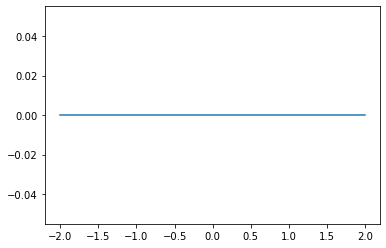

In [106]:
plt.plot(np.arange(-2,2,.01), tmp.numpy() > .5)

In [85]:
model.variables

[<tf.Variable 'sample_net_12/dense_40/kernel:0' shape=(1, 3) dtype=float32, numpy=array([[-0.8661288 ,  0.79587156,  0.6885964 ]], dtype=float32)>,
 <tf.Variable 'sample_net_12/dense_40/bias:0' shape=(3,) dtype=float32, numpy=array([-0.1150253 , -0.05104431, -0.20101435], dtype=float32)>,
 <tf.Variable 'sample_net_12/dense_41/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.37641406,  0.7823706 ,  0.7067373 ],
        [-0.9865818 ,  0.6105025 , -0.05886904],
        [-0.4147389 ,  1.0198317 ,  1.0358335 ]], dtype=float32)>,
 <tf.Variable 'sample_net_12/dense_41/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.        , -0.15976425, -0.20774105], dtype=float32)>,
 <tf.Variable 'sample_net_12/dense_42/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.37641406,  0.65268254,  0.36989117],
        [-0.9865818 ,  0.8375254 , -0.03771552],
        [-0.4147389 ,  1.1645573 ,  1.0208275 ]], dtype=float32)>,
 <tf.Variable 'sample_net_12/dense_42/bias:0' shape=(3,) dtype=float32, 

In [101]:
model.layers[2].set_weights([np.zeros((3,3)), np.zeros(3)])

In [104]:
model.layers[2].get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

## loading AlexNet's weights

In [4]:
weights =  np.load(open("tf_weights/bvlc_alexnet.npy", "rb"), 
                   encoding="latin1", allow_pickle=True).item()

In [7]:
for key in np.sort([x for x in weights]):
    print(key)

conv1
conv2
conv3
conv4
conv5
fc6
fc7
fc8


In [2]:
from tf_weights.bvlc_alexnet import AlexNet
AlexNet_model = AlexNet.__init__()

ModuleNotFoundError: No module named 'kaffe'